# Classfication Using Decision Tree, XGBoost and SVM on Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
data= pd.read_csv("tit.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# Checkimg Percentage of Missing Data in each Feature

In [6]:
def missing_check(data):
    missing_values = data.isnull().sum().sort_values(ascending = False)
    percentage_missing_values = (missing_values/len(data))*100
    print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing']))

In [7]:
missing_check(data)

             Missing values  % Missing
Cabin                   687  77.104377
Age                     177  19.865320
Embarked                  2   0.224467
Fare                      0   0.000000
Ticket                    0   0.000000
Parch                     0   0.000000
SibSp                     0   0.000000
Sex                       0   0.000000
Name                      0   0.000000
Pclass                    0   0.000000
Survived                  0   0.000000
PassengerId               0   0.000000


# Data Imputation


In [8]:
data["Age"]=data["Age"].fillna(data["Age"].median())
data["Embarked"]=data["Embarked"].fillna("S")

In [9]:
data["Family Size"]= data["SibSp"]+data["Parch"]+1
data=data.drop(["Name","Cabin","SibSp","Parch","Ticket"],axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family Size
0,1,0,3,male,22.0,7.2500,S,2
1,2,1,1,female,38.0,71.2833,C,2
2,3,1,3,female,26.0,7.9250,S,1
3,4,1,1,female,35.0,53.1000,S,2
4,5,0,3,male,35.0,8.0500,S,1


In [10]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family Size
0,1,0,3,male,22.0,7.2500,S,2
1,2,1,1,female,38.0,71.2833,C,2
2,3,1,3,female,26.0,7.9250,S,1
3,4,1,1,female,35.0,53.1000,S,2
4,5,0,3,male,35.0,8.0500,S,1


In [11]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family Size    0
dtype: int64

# One Hot Encoding

In [12]:
dummies=pd.get_dummies(data[["Embarked","Sex"]],drop_first=True)

In [13]:
data=pd.concat([data,dummies],axis=1)

In [14]:
data=data.drop(["Sex","Embarked"],axis=1)

In [15]:
data.head()

,PassengerId,Survived,Pclass,Age,Fare,Family Size,Embarked_Q,Embarked_S,Sex_male
0,1,0,3,22.0,7.2500,2,0,1,1
1,2,1,1,38.0,71.2833,2,0,0,0
2,3,1,3,26.0,7.9250,1,0,1,0
3,4,1,1,35.0,53.1000,2,0,1,0
4,5,0,3,35.0,8.0500,1,0,1,1


In [16]:
data.describe()

,PassengerId,Survived,Pclass,Age,Fare,Family Size,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,32.204208,1.904602,0.086420,0.725028,0.647587
std,257.353842,0.486592,0.836071,13.019697,49.693429,1.613459,0.281141,0.446751,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,7.910400,1.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,14.454200,1.000000,0.000000,1.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,31.000000,2.000000,0.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,11.000000,1.000000,1.000000,1.000000


# Data Partition

In [17]:
from sklearn.model_selection import train_test_split

def data_part(X, y, split_size) :
    
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size = split_size)
    print(X_train.shape)
    print(X_test.shape)
    
    return X_train, X_test, y_train, y_test

In [18]:
X=data.drop("Survived",axis=1)
y=data["Survived"]

In [19]:
X_train, X_test, y_train, y_test=data_part(X,y,split_size=0.3)

(623, 8)
(268, 8)


# Cross Val to check best Max-Depth Param

In [20]:
acc=[]
for i in range(1,20):
    DT = DecisionTreeClassifier(max_depth=i,random_state=42)
    scores_new = cross_val_score(DT, X_train, y_train, cv=10, scoring='accuracy')
    acc.append(scores_new.mean())
            

In [21]:
acc

[0.7866263440860214,
 0.783323732718894,
 0.8169418842805939,
 0.7961757552483358,
 0.7929243471582181,
 0.7881616423451101,
 0.7977126536098309,
 0.7865743407578085,
 0.7913882488479262,
 0.7673963133640552,
 0.7769473246287762,
 0.7785610279057859,
 0.7769729262672811,
 0.7672955069124423,
 0.759256592421915,
 0.7576436891961086,
 0.756030785970302,
 0.7576436891961086,
 0.7576436891961086]

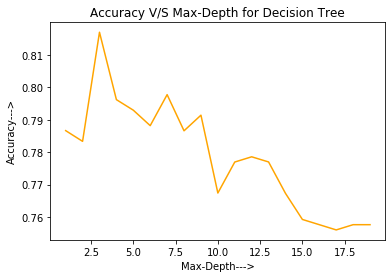

In [22]:
plt.plot(list(range(1,20)),acc,color="orange")
plt.title("Accuracy V/S Max-Depth for Decision Tree")
plt.xlabel("Max-Depth--->")
plt.ylabel("Accuracy--->")
plt.show()

In [23]:
DecTr=DecisionTreeClassifier(max_depth=3,random_state=42)
DecTr.fit(X_train,y_train)
pred_train=DecTr.predict(X_train)
pred_test=DecTr.predict(X_test)

In [24]:
tr_acc=accuracy_score(y_train,pred_train)
te_acc=accuracy_score(y_test,pred_test)

In [25]:
print("Training Accuracy:",tr_acc*100,"%")

Training Accuracy: 83.46709470304975 %


In [26]:
print("Test Accuracy:",te_acc*100,"%")

Test Accuracy: 81.71641791044776 %


# Confusion Matrix

In [27]:
confusion_matrix(y_test,pred_test,labels=[0,1])

array([[141,  17],
       [ 32,  78]], dtype=int64)

# ROC-AUC Curve

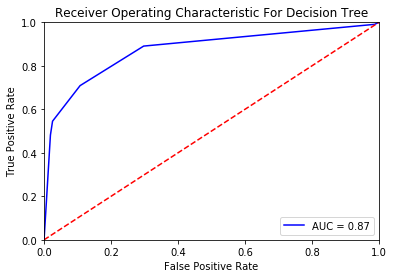

In [28]:
probs_dec = DecTr.predict_proba(X_test)
preds_dec = probs_dec[:,1]
fpr_dec, tpr_dec, threshold_dec = metrics.roc_curve(y_test, preds_dec)
roc_auc_dec = metrics.auc(fpr_dec, tpr_dec)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic For Decision Tree')
plt.plot(fpr_dec, tpr_dec, 'b', label = 'AUC = %0.2f' % roc_auc_dec)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Contructing Tree

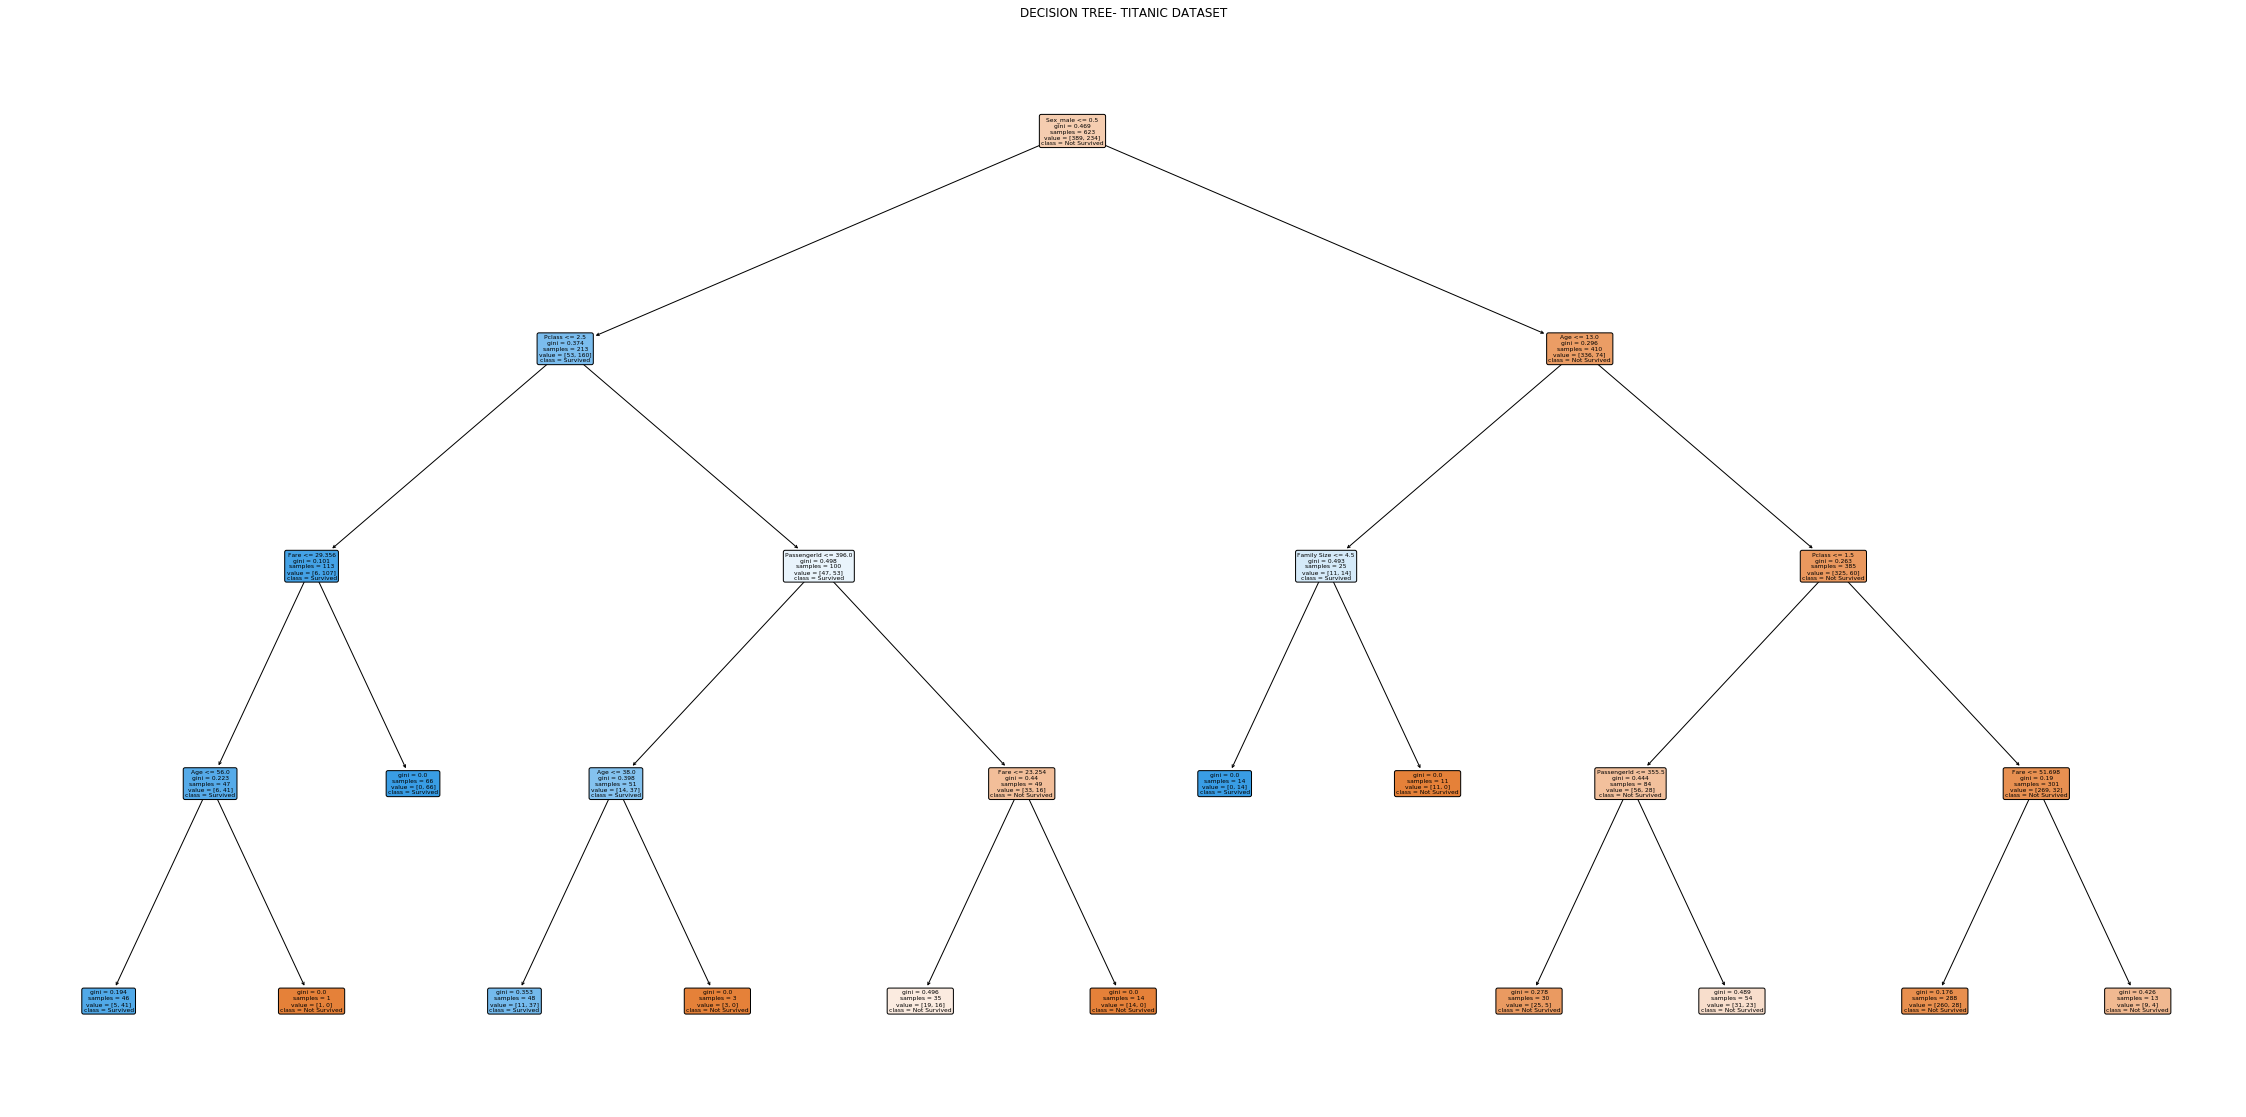

In [38]:
from sklearn import tree
plt.figure(figsize=(40,20))  
_ = tree.plot_tree(DecTr, feature_names = list(X.columns),class_names= ["Not Survived","Survived"],
             filled=True, fontsize=6, rounded = True)
plt.title("DECISION TREE- TITANIC DATASET")
plt.show()

# Function For GRID SEARCH CV and MODEL EVALUATION

In [39]:
from sklearn.model_selection import GridSearchCV

def model_building(X, y, test, model, params = None, k = 1) :
    
    if params == None :
        
        ## Fit model 
        model.fit(X, y)
        
        # return fitted model & train-test predictions
        return (model, model.predict(X), model.predict(test))
    
    else :
        
        model_cv = GridSearchCV(model, param_grid = params, cv = k)
        
        ## Fit model_cv using 
        model_cv.fit(X, y)
        
        ## check best estimator 
        model = model_cv.best_estimator_
        
        print(model_cv.best_estimator_)
        # return and extra object for all cross validation operations
        return (model_cv, model, model.predict(X), model.predict(test))

In [40]:
from sklearn.metrics import accuracy_score
def model_evaluation(y_train, pred_train, y_test, pred_test) :
    
    print('''
            =========================================
               Accuracy FOR TRAIN DATA
            =========================================''')
    print("Accuracy : ", accuracy_score(y_train, pred_train))
    
    print('''
            =========================================
               Accuracy FOR TEST DATA
            =========================================''')
    print("Accuracy : ", accuracy_score(y_test, pred_test))

In [41]:
estimator= XGBClassifier(random_state=42)
parameters={'colsample_bytree': [0.55,0.6,0.7],'n_estimators':[50,100,200],'max_depth':[3,5,6,7],'learning_rate':[0.01,0.015]}

# XGBCLASSIFIER MODELING

In [42]:
model_cv, model, pred_train, pred_test = model_building(X_train, y_train,X_test, estimator, parameters, 5)
print('===================================================================\n\t\t\t',
          type(estimator).__name__,
          '\n===================================================================\n')
    
print(model_cv.best_params_, '\n\n')
model_evaluation(y_train, pred_train, y_test, pred_test)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.015, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)
			 XGBClassifier 

{'colsample_bytree': 0.7, 'learning_rate': 0.015, 'max_depth': 6, 'n_estimators': 100} 



               Accuracy FOR TRAIN DATA
Accuracy :  0.9085072231139647

               Accuracy FOR TEST DATA
Accuracy :  0.8134328358208955


# Cross Validation For Max-Depth

In [43]:
accuracy_boost=[]
for i in range(1,9):
    Boost = XGBClassifier(max_depth=i,random_state=42,n_estimators=100,colsample_bytree=0.7,learning_rate=0.015)
    scores_boost = cross_val_score(Boost, X_train, y_train, cv=5, scoring='accuracy')
    accuracy_boost.append(scores_boost.mean())

In [44]:
accuracy_boost

[0.7959934959349594,
 0.8265495934959348,
 0.8330016260162602,
 0.8281756097560976,
 0.8330276422764227,
 0.8410016260162602,
 0.8281756097560976,
 0.8281756097560976]

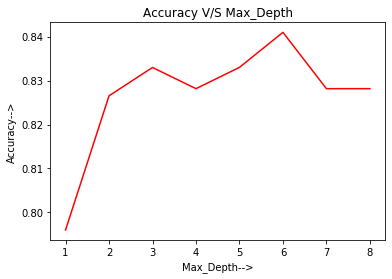

In [46]:
plt.plot(list(range(1,9)),accuracy_boost,color="red")
plt.title("Accuracy V/S Max_Depth")
plt.xlabel("Max_Depth-->")
plt.ylabel("Accuracy-->")
plt.show()

In [50]:
xgb=XGBClassifier(max_depth=6,random_state=42,n_estimators=100,colsample_bytree=0.7,learning_rate=0.015)
xgb.fit(X_train,y_train)
pred_train_xgb= xgb.predict(X_train)
pred_test_xgb=xgb.predict(X_test)

In [51]:
print("Final Training Accuracy:",accuracy_score(y_train,pred_train_xgb)*100,"%")
print("Final Testing Accuracy:",accuracy_score(y_test,pred_test_xgb)*100,"%")

Final Training Accuracy: 90.85072231139647 %
Final Testing Accuracy: 81.34328358208955 %


# Confusion Matrix

In [52]:
confusion_matrix(y_test,pred_test_xgb,labels=[0,1])

array([[144,  16],
       [ 34,  74]], dtype=int64)

# ROC-AUC Curve


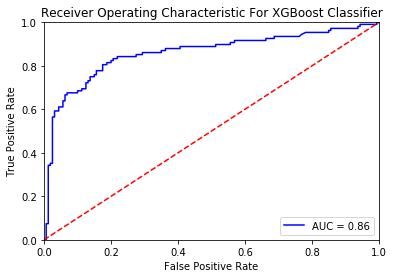

In [54]:
probs_xgb = xgb.predict_proba(X_test)
preds_xgb = probs_xgb[:,1]
fpr_x, tpr_x, threshold_x = metrics.roc_curve(y_test, preds_xgb)
roc_auc_x = metrics.auc(fpr_x, tpr_x)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic For XGBoost Classifier')
plt.plot(fpr_x, tpr_x, 'b', label = 'AUC = %0.2f' % roc_auc_x)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SVM- Checking Accuracy on Different Kernels

In [56]:
kernels=["linear","rbf","sigmoid"]
accuracy_svc=[]
for i in kernels:
    svc=SVC(random_state=42,kernel=i)
    svc.fit(X_train,y_train)
    pred=svc.predict(X_test)
    accuracy_test=accuracy_score(y_test,pred)
    accuracy_svc.append(accuracy_test)

C:\Users\nishc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nishc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [57]:
accuracy_svc

[0.7723880597014925, 0.5970149253731343, 0.5970149253731343]

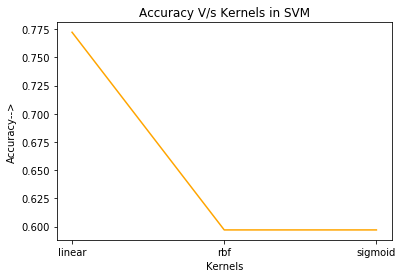

In [58]:
plt.plot(kernels,accuracy_svc,color="orange")
plt.title("Accuracy V/s Kernels in SVM")
plt.xlabel("Kernels")
plt.ylabel("Accuracy-->")
plt.show()

In [60]:
svc_lin=SVC(random_state=42,kernel="linear")
svc_lin.fit(X_train,y_train)
pred_te=svc_lin.predict(X_test)
pred_tr=svc_lin.predict(X_train)

In [61]:
print("Final Training Accuracy:",accuracy_score(y_train,pred_tr)*100,"%")
print("Final Testing Accuracy:",accuracy_score(y_test,pred_te)*100,"%")

Final Training Accuracy: 80.57784911717496 %
Final Testing Accuracy: 77.23880597014924 %


# Confusion Matrix

In [64]:
confusion_matrix(y_test,pred_te,labels=[0,1])

array([[135,  25],
       [ 36,  72]], dtype=int64)